In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline


In [92]:
# Reading Data

df = pd.read_csv("FuelConsumptionCo2.csv")
df.head(3)
                 

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [93]:
# Data Exploration

df.describe()  # shows summary of data

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [94]:
# selecting specific features
cdf = df[['ENGINESIZE','FUELCONSUMPTION_COMB','CYLINDERS','CO2EMISSIONS']]
cdf.head(4)


,ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,2.0,8.5,4,196
1,2.4,9.6,4,221
2,1.5,5.9,4,136
3,3.5,11.1,6,255


# Visualizations 

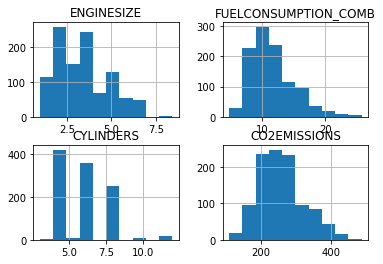

In [95]:

#Plotting features on histogram

cdf.hist()
plt.show()


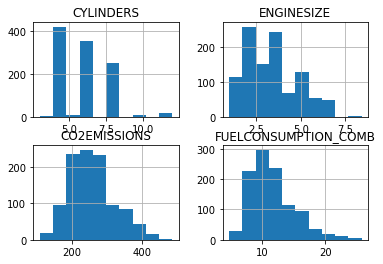

In [96]:
#if we want to change the plot positions, then variable's position should be changed.
cdf_1 = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

cdf_1.hist() ; plt.show()

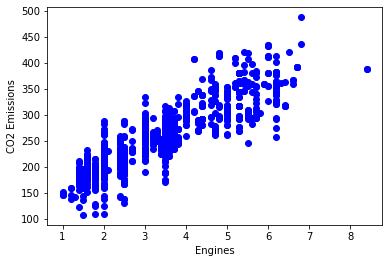

In [97]:
# Checking the Relationship between different variables.
# Here comes use of matplotlib library.

# I want to use "for loop" here to pick the variables name by itself and make scatter plots by itself for all of them.

plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS, color='blue');
plt.xlabel("Engines") ; plt.ylabel("CO2 Emissions") ; plt.show();


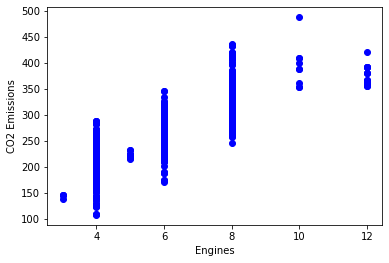

In [98]:
plt.scatter(cdf.CYLINDERS , cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engines") ; plt.ylabel("CO2 Emissions") ; plt.show();

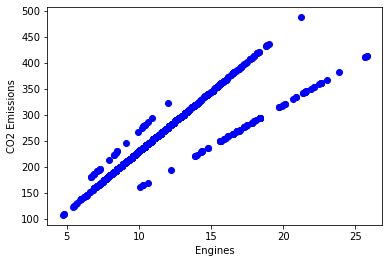

In [99]:
plt.scatter(cdf.FUELCONSUMPTION_COMB , cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engines") ; plt.ylabel("CO2 Emissions") ; plt.show();

# Splitting Data into Train/Test

#### To select randoms rows, use np.random.rand()
this is the usage of nump to divide data.

In [100]:
# msk means mask for data
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
train_test_ratio = len(train) , len(test)
train_test_ratio

(869, 198)

In [101]:
train

,ENGINESIZE,FUELCONSUMPTION_COMB,CYLINDERS,CO2EMISSIONS
0,2.0,8.5,4,196
1,2.4,9.6,4,221
2,1.5,5.9,4,136
4,3.5,10.6,6,244
5,3.5,10.0,6,230
...,...,...,...,...
1057,2.5,10.1,5,232
1059,3.2,10.2,6,235
1061,3.2,11.2,6,258
1062,3.0,11.8,6,271


#### Train Data Distribution


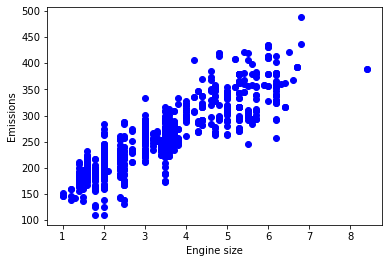

In [102]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS , color = 'blue')
plt.xlabel("Engine size") ; plt.ylabel("Emissions");
plt.show()

#### Modeling
Using sklearn package to model data.

In [103]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])        # train[['variable']] fetches the data.
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)

# Regression Coefficients
print('Coefficients:' , regr.coef_ ,' Intercept: ',regr.intercept_)


Coefficients: [[39.25687479]]  Intercept:  [125.1575184]


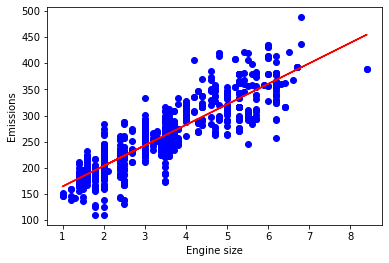

In [104]:
# Plotting Outputs
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS , color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_, '-r')
plt.xlabel("Engine size") ; plt.ylabel("Emissions");
plt.show()


In [108]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_predicted = regr.predict(test_x)


mean_abs_error = np.mean(np.absolute(test_y - test_y_predicted ))
print("Mean absolute error : ", mean_abs_error)
print("Residual sum of square: %.2f" % np.mean((test_y - test_y_predicted) **2) )
print("R2 Score: %.2f" % r2_score(test_y , test_y_predicted))

Mean absolute error :  22.042392509307394
Residual sum of square: 856.76
R2 Score: 0.75
